# Python для анализа данных

## ДЗ 4

*Придумывал: Ян Пиле, НИУ ВШЭ*  

## Задача 1

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
    2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [2]:
import pandas as pd #import famous datascience lib
import requests #lib for internet requests

url_1 = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара' #targer url for data analyze

r_1 = requests.get(url_1) #make request from target url
wiki_1 = r_1.text # take text from target url request

tables_1 = pd.read_html(wiki_1, encoding="UTF-8") #list of tabels from target page
len(tables_1) #look how many tables 

21

In [3]:
# tables_1 # & take a look to this tables, looks ugly, find start and and of data

In [4]:
tables_1[11] #find the table starting from which there are data not related to the task

,Год,Фильм,Победы,Номинации,Достижение
0,1929,Крылья,2,2,"Первый военный фильм, победивший в категории Л..."
1,1930-I,Бродвейская мелодия,1,3,"Первый музыкальный фильм, победивший в категор..."
2,1931,Симаррон,3,7,"Первый вестерн, победивший в категории Лучший ..."
3,1935,Это случилось однажды ночью,5,5,"Первая кинокомедия, победившая в категории Луч..."
4,1938,Жизнь Эмиля Золя,3,10,"Первый биографический фильм, победивший в кате..."
5,1940,Волшебник страны Оз,2,6,"Первый фильм для детей, номинированный за Лучш..."
6,1941,Ребекка,2,11,"Первый (и единственный) триллер, победивший в ..."
7,1968,Душной южной ночью,5,7,Первый и единственный детективный/таинственный...
8,1972,Заводной апельсин,0,4,"Первый научно-фантастический фильм, номинирова..."
9,1974,Изгоняющий дьявола,2,10,"Первый фильм ужасов, номинированный за Лучший ..."


In [5]:
table_1 = pd.concat(tables_1[0:10]) # make dataframe from tables with data of interest to us 
table_1.reset_index(drop=True, inplace=True) # make pass-through indexes
table_1.columns = ['year', 'movie', 'company', 'producer', 'links'] # rename columns

# table_1 = table.drop(['year', 'links'], axis='columns') # this columns don't need for task
table_1['producer'] = table_1['producer'].str.replace(r'(\s[и]\s)|[,]\s', '/', regex=True) # delimeter replacement for producer
table_1['company'] = table_1['company'].astype(str).str.replace(r'(\s[и]\s)|[,]\s', '/', regex=True) # delimeter replacement company
table_1.isnull().sum().sum() # look to NaN values, total

43

In [6]:
table_1.fillna('-', inplace=True) # fill NaN values
table_1.isnull().sum() # look to NaN values again, by columns

year        0
movie       0
company     0
producer    0
links       0
dtype: int64

In [7]:
table_1 # look on dataframe

,year,movie,company,producer,links
0,1929 (1-я),★ «Крылья»,Paramount Pictures/Famous Players-Lasky,Люсьен Хаббард,[# 1]
1,1929 (1-я),«Рэкет»,Caddo/Paramount,Говард Хьюз,[# 1]
2,1929 (1-я),«Седьмое небо»,Fox Film Corporation,Уильям Фокс,[# 1]
3,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,Ирвинг Талберг/Лоуренс Уэйнгартен,[# 2]
4,1930-I (2-я),«Алиби»,Feature Productions/United Artists,Роланд Уэст,[# 2]
...,...,...,...,...,...
558,2020 (92-я),«Джокер»,nan,Тодд Филлипс/Брэдли Купер/Эмма Тиллинджер Коскофф,-
559,2020 (92-я),«Маленькие женщины»,nan,Эми Паскаль,-
560,2020 (92-я),«Брачная история»,nan,Ноа Баумбах/Дэвид Хейман,-
561,2020 (92-я),«1917»,nan,Сэм Мендес/Пиппа Харрис/Джейн‑Энн Тенггрен/Кал...,-


In [8]:
from collections import Counter # provides specialized data types based on dictionaries, tuples, sets, lists.

prod_lst = list([x for producer in [s.split('/') for s in table_1['producer']] for x in producer]) # make list of producers separated by delimeter
c4_1 = Counter(prod_lst) # count for producers in prod list
c4_1.most_common(5) # look on som fo it

[('Хэл Б. Уоллис', 19),
 ('Дэррил Фрэнсис Занук', 14),
 ('Стивен Спилберг', 10),
 ('Хенри Блэнк', 9),
 ('Скотт Рудин', 9)]

In [9]:
table_1[table_1['producer'].str.contains("Стивен Спилберг", na=False)]['movie'].count() # pandas build-in method to count specific produser

10

**10** раз были номинированы фильмы, созданные при участии Стивена Спилберга.

In [10]:
winners_df = table_1[table_1['movie'].str.contains("★", na=False)] # create an intermediate dataframe, contains only winners
winners_df.reset_index(drop=True, inplace=True) # make pass-through indexes
winners_df # look on this df
# company contains not NaN, but str-type nan values, which can make troubles

,year,movie,company,producer,links
0,1929 (1-я),★ «Крылья»,Paramount Pictures/Famous Players-Lasky,Люсьен Хаббард,[# 1]
1,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,Ирвинг Талберг/Лоуренс Уэйнгартен,[# 2]
2,1930-II (3-я),★ «На западном фронте без перемен»,Universal,Карл Леммле-мл.,[# 3]
3,1931 (4-я),★ «Симаррон»,RKO Radio Pictures,Уильям Лебарон,[# 4]
4,1932 (5-я),★ «Гранд-отель»,Metro-Goldwyn-Mayer,Ирвинг Тальберг,[# 5]
...,...,...,...,...,...
87,2016 (88-я),★ «В центре внимания»,Open Road Films/Anonymous Content/First Look M...,Майкл Шуга/Стив Голин/Николь Роклин/Блай Пэгон...,-
88,2017 (89-я),★ «Лунный свет»,A24/Plan B Entertainment,Адель Романски/Деде Гарднер/Джереми Клейнер,-
89,2018 (90-я),★ «Форма воды»,Fox Searchlight Pictures/TSG Entertainment/Dou...,Гильермо дель Торо/Дж. Майлз Дэйл,-
90,2019 (91-я),★ «Зелёная книга»,nan,Джим Берк/Чарльз Б. Весслер/Брайан Карри/Питер...,-


In [11]:
winners_df['company'].replace('nan', '-', inplace=True) # fix it
winners_df # some control

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,year,movie,company,producer,links
0,1929 (1-я),★ «Крылья»,Paramount Pictures/Famous Players-Lasky,Люсьен Хаббард,[# 1]
1,1930-I (2-я),★ «Бродвейская мелодия»,Metro-Goldwyn-Mayer,Ирвинг Талберг/Лоуренс Уэйнгартен,[# 2]
2,1930-II (3-я),★ «На западном фронте без перемен»,Universal,Карл Леммле-мл.,[# 3]
3,1931 (4-я),★ «Симаррон»,RKO Radio Pictures,Уильям Лебарон,[# 4]
4,1932 (5-я),★ «Гранд-отель»,Metro-Goldwyn-Mayer,Ирвинг Тальберг,[# 5]
...,...,...,...,...,...
87,2016 (88-я),★ «В центре внимания»,Open Road Films/Anonymous Content/First Look M...,Майкл Шуга/Стив Голин/Николь Роклин/Блай Пэгон...,-
88,2017 (89-я),★ «Лунный свет»,A24/Plan B Entertainment,Адель Романски/Деде Гарднер/Джереми Клейнер,-
89,2018 (90-я),★ «Форма воды»,Fox Searchlight Pictures/TSG Entertainment/Dou...,Гильермо дель Торо/Дж. Майлз Дэйл,-
90,2019 (91-я),★ «Зелёная книга»,-,Джим Берк/Чарльз Б. Весслер/Брайан Карри/Питер...,-


In [13]:
comp_lst = list([x for company in [s.split('/') for s in winners_df['company']] for x in company]) # list of companies
c4_2 = Counter(comp_lst) # apply the counter again
c4_2.most_common(5) # look up result

[('Columbia Pictures', 12),
 ('United Artists', 12),
 ('Warner Bros.', 10),
 ('Paramount Pictures', 9),
 ('Metro-Goldwyn-Mayer', 9)]

Фильмы Warner Bros. получили на **1** Оскар за лучший фильм больше чем фильмы Paramount Pictures. (10 против 9)

## Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [14]:
url_2 = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль' # target url for second task
r_2 = requests.get(url_2) # and again request
wiki_2 = r_2.text # take text

tables_2 = pd.read_html(wiki_2, encoding="UTF-8") # list of tables form target url
len(tables_2) # how many tables we have?

18

In [15]:
# tables_2 # looks ugly too, find start and and of data

In [16]:
tables_2[2] # our data start from

,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
5,2-я (1930-I),NaN,• Мэри Пикфорд,«Кокетка»,Норма Безант
6,2-я (1930-I),NaN,• Рут Чаттертон,«Мадам Икс»,Жаклин Флорио
7,2-я (1930-I),NaN,• Бетти Компсон,«Зазывала»,Кэрри
8,2-я (1930-I),NaN,• Джинн Иглс (посмертно),«Письмо»,Лесли Кросби
9,2-я (1930-I),NaN,• Коринна Гриффит,«Божественная леди»,леди Эмма Гамильтон


In [17]:
table_2 = pd.concat(tables_2[2:12]) # make a dataframe from the data needed to answer the task 2
table_2 # and look on this df. we have seen that data split staggered to some columns, fix it

,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль,Фильм,Роль.1
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана,NaN,NaN
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела,NaN,NaN
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена,NaN,NaN
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник,NaN,NaN
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон,NaN,NaN
...,...,...,...,...,...,...,...
45,92-я (2020),NaN,• Рене Зеллвегер,NaN,Джуди Гарленд,«Джуди»,NaN
46,92-я (2020),NaN,• Синтия Эриво,NaN,Гарриет Табмен,«Гарриет»,NaN
47,92-я (2020),NaN,• Скарлетт Йоханссон,NaN,Николь Барбер,«Брачная история»,NaN
48,92-я (2020),NaN,• Сирша Ронан,NaN,Джозефина «Джо» Марч,«Маленькие женщины»,NaN


In [18]:
table_2['Фильм(ы)'].fillna(table_2['Фильм'], inplace=True) # fix this
table_2['Роль'].fillna(table_2['Роль.1'], inplace=True) # and fix this
table_2 # control

,Церемония,Фото лауреата,Актриса,Фильм(ы),Роль,Фильм,Роль.1
0,1-я (1929),NaN,• Джанет Гейнор,«Седьмое небо»,Дайана,NaN,NaN
1,1-я (1929),NaN,• Джанет Гейнор,«Уличный ангел»,Анджела,NaN,NaN
2,1-я (1929),NaN,• Джанет Гейнор,«Восход солнца»,жена,NaN,NaN
3,1-я (1929),NaN,• Луиза Дрессер,«Корабль приплывает»,миссис Плезник,NaN,NaN
4,1-я (1929),NaN,• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон,NaN,NaN
...,...,...,...,...,...,...,...
45,92-я (2020),NaN,• Рене Зеллвегер,«Джуди»,Джуди Гарленд,«Джуди»,NaN
46,92-я (2020),NaN,• Синтия Эриво,«Гарриет»,Гарриет Табмен,«Гарриет»,NaN
47,92-я (2020),NaN,• Скарлетт Йоханссон,«Брачная история»,Николь Барбер,«Брачная история»,NaN
48,92-я (2020),NaN,• Сирша Ронан,«Маленькие женщины»,Джозефина «Джо» Марч,«Маленькие женщины»,NaN


In [19]:
table_2.reset_index(drop=True, inplace=True) # pass-through indexes
table_2 = table_2.drop(['Фото лауреата', 'Фильм', 'Роль.1'], axis='columns') # drop superfluous columns
table_2.columns = ['year', 'actress', 'movie', 'role'] # rename other columns
table_2.isna().sum().sum() # control NaN's

0

In [20]:
table_2 # look at the clear df

,year,actress,movie,role
0,1-я (1929),• Джанет Гейнор,«Седьмое небо»,Дайана
1,1-я (1929),• Джанет Гейнор,«Уличный ангел»,Анджела
2,1-я (1929),• Джанет Гейнор,«Восход солнца»,жена
3,1-я (1929),• Луиза Дрессер,«Корабль приплывает»,миссис Плезник
4,1-я (1929),• Глория Свенсон,«Сэди Томпсон»,Сэди Томпсон
...,...,...,...,...
454,92-я (2020),• Рене Зеллвегер,«Джуди»,Джуди Гарленд
455,92-я (2020),• Синтия Эриво,«Гарриет»,Гарриет Табмен
456,92-я (2020),• Скарлетт Йоханссон,«Брачная история»,Николь Барбер
457,92-я (2020),• Сирша Ронан,«Маленькие женщины»,Джозефина «Джо» Марч


In [21]:
table_2['actress'].value_counts().head(5) #answer to second task, use in-build pandas method

• Мерил Стрип       17
• Кэтрин Хепбёрн    12
• Бетт Дейвис       11
• Грир Гарсон        7
• Джейн Фонда        6
Name: actress, dtype: int64

1. Мерил Стрип чаще всего номинировалась на Оскар.
2. Количество номинаций самой часто номинировавшейся актрисы и второй по частоте отличается на 5 (Мерил Стрип - 17, Кэтрин Хепбёрн - 12)

## Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года. Если вы сгрузили данные в pandas-dataframe, графики можно построить так:

In [3]:
url_3 = 'https://www.worldometers.info/world-population/world-population-by-year/'
r_3 = requests.get(url_3)
website = r_3.text

tables_3 = pd.read_html(website, encoding="UTF-8")
len(tables_3)

1

In [4]:
df = tables_3[0]
df.dtypes

Year                  int64
World Population      int64
YearlyChange         object
NetChange           float64
Density(P/Km²)      float64
UrbanPop            float64
UrbanPop %           object
dtype: object

In [5]:
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
89,-1000,50000000,NaN,NaN,NaN,NaN,NaN
90,-2000,27000000,NaN,NaN,NaN,NaN,NaN
91,-3000,14000000,NaN,NaN,NaN,NaN,NaN
92,-4000,7000000,NaN,NaN,NaN,NaN,NaN


In [6]:
# df.dropna(inplace=True)
# import re
# ch = []    
# for values in df['YearlyChange']:
#     ch.append(re.search(r'\d\.\d+', values).group())


# df['Change'] = ch
# df['Change'] = df['Change'].astype(float)

In [ ]:
# u = []    
# for values in df['UrbanPop %']:
#     u.append(re.search(r'\d\.*\d+', values).group())
# df['Urban'] = u
# df['Urban'] = df['Urban'].astype(float)

In [7]:
df.drop(df.tail(24).index,inplace=True)
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %
...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195.0,19.0,8.770088e+08,32 %
66,1954,2724846741,1.76 %,47237781.0,18.0,8.501791e+08,31 %
67,1953,2677608960,1.78 %,46747398.0,18.0,8.242900e+08,31 %
68,1952,2630861562,1.81 %,46827301.0,18.0,7.992825e+08,30 %


In [8]:
# df['urban_change'] = df['UrbanPop'].diff(periods=-1).fillna(abs(df['UrbanPop'].diff(periods=1)))
df['urban_change'] = df['UrbanPop'].diff(periods=-1)

In [ ]:
# df['urban_change'] = df['urban_change'].interpolate(method='linear')

In [9]:
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %,urban_change
0,2020,7794798739,1.05 %,81330639.0,52.0,4.378994e+09,56 %,79555326.0
1,2019,7713468100,1.08 %,82377060.0,52.0,4.299439e+09,56 %,79621300.0
2,2018,7631091040,1.10 %,83232115.0,51.0,4.219817e+09,55 %,79628724.0
3,2017,7547858925,1.12 %,83836876.0,51.0,4.140189e+09,55 %,79535911.0
4,2016,7464022049,1.14 %,84224910.0,50.0,4.060653e+09,54 %,79155020.0
...,...,...,...,...,...,...,...,...
65,1955,2773019936,1.77 %,48173195.0,19.0,8.770088e+08,32 %,26829736.0
66,1954,2724846741,1.76 %,47237781.0,18.0,8.501791e+08,31 %,25889117.0
67,1953,2677608960,1.78 %,46747398.0,18.0,8.242900e+08,31 %,25007456.0
68,1952,2630861562,1.81 %,46827301.0,18.0,7.992825e+08,30 %,24214836.0


In [ ]:
# df.dropna(inplace=True)
# df['UrbanPop'] = df['UrbanPop'].astype(int)
# df['urban_change'] = df['urban_change'].astype(int)

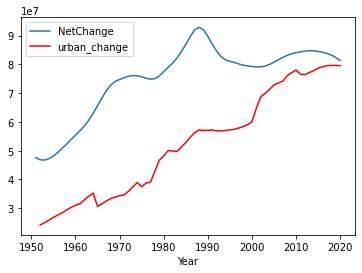

In [10]:
import matplotlib.pyplot as plt
ax = plt.gca();

df.plot(kind='line',x='Year',y='NetChange',ax=ax)
df.plot(kind='line',x='Year',y='urban_change', color='red', ax=ax)
# p_2 = df.plot(x='Year', y1='NetChange', y2='urban_change')